 **Atividade 2.6 - Hamilton Celerino da Fonseca Neto**

# Import e Dataset

In [1]:
%matplotlib inline
import torch
from torch import nn, optim
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

torch.manual_seed(1234)


In [3]:
iris = load_iris()
data = iris.data[iris.target==1, ::2]

x_train = data[:,0:1].astype(np.float32)
y_train = data[:,1:2].astype(np.float32)

n_samples = x_train.shape[0]

print("x_train.shape:", x_train.shape, x_train.dtype)
print("y_train.shape:", y_train.shape, y_train.dtype)

print("x_train[:5]:\n", x_train[:5])
print("y_train[:5]:\n", y_train[:5])


x_train.shape: (50, 1) float32
y_train.shape: (50, 1) float32
x_train[:5]:
 [[7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]]
y_train[:5]:
 [[4.7]
 [4.5]
 [4.9]
 [4. ]
 [4.6]]


# Normalização

In [4]:
x_train -= x_train.min()
x_train /= x_train.max()

y_train -= y_train.min()
y_train /= y_train.max()

In [5]:
x_train_bias = np.hstack([np.ones((n_samples, 1)), x_train])

x_train_bias = torch.FloatTensor(x_train_bias)
y_train      = torch.FloatTensor(y_train)


In [6]:
model = torch.nn.Linear(2, 1, bias=False)


# Inicialização

In [8]:
model.weight.data = torch.zeros(1,2)
torch.nn.init.uniform_(model.weight.data, -0.1, 0.1)
model.weight.data


tensor([[-0.0883,  0.0401]])

# Testar Previsão

In [9]:
model(Variable(torch.ones((5,2))))


tensor([[-0.0482],
        [-0.0482],
        [-0.0482],
        [-0.0482],
        [-0.0482]], grad_fn=<MmBackward0>)

# Definir Critérios (Perda e Otimizador)

In [10]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.3)


#Treinamento

In [11]:
num_epochs = 120

w0_list = []
w1_list = []

for epoch in range(num_epochs):
    inputs = x_train_bias
    target = y_train

    # forward
    out = model(inputs)

    # salvar pesos (para atividade 2)
    w0_list.append(model.weight.data[0][0].item())
    w1_list.append(model.weight.data[0][1].item())

    # loss
    loss = criterion(out, target)

    # backward + step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 20 == 0:
        print("Epoch[{}/{}], loss: {:.6f}".format(epoch+1, num_epochs, loss.data))


Epoch[20/120], loss: 0.023874
Epoch[40/120], loss: 0.022027
Epoch[60/120], loss: 0.021442
Epoch[80/120], loss: 0.021256
Epoch[100/120], loss: 0.021197
Epoch[120/120], loss: 0.021178


# Atividade 1: Calcule o valor da função de custo (MSE) depois da rede treinada, utilizando a função criterion utilizada no laço de treinamento.

In [12]:
y_pred = model(x_train_bias)
loss_final = criterion(y_pred, y_train)

print("MSE final utilizando a criterion:", loss_final.data)


MSE final utilizando a criterion: tensor(0.0212)


Atividade 2: Faça igual o exercício do notebook anterior, de plotar um gráfico scatterplot para mostrar a evolução dos parâmetros durante o treinamento pelo gradiente descendente.

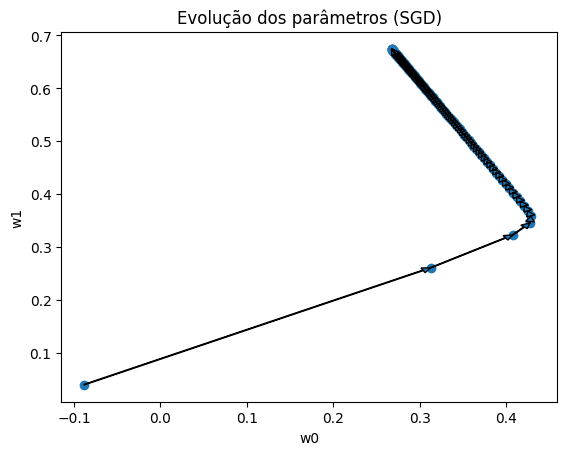

In [15]:
plt.scatter(w0_list, w1_list)

w0_old = None
for (w0, w1) in zip(w0_list, w1_list):
    if w0_old is not None:
        plt.arrow(w0_old, w1_old,
                  w0 - w0_old,
                  w1 - w1_old,
                  head_length=0.01,
                  head_width=0.01,
                  length_includes_head=True)
    w0_old, w1_old = w0, w1

plt.xlabel("w0")
plt.ylabel("w1")
plt.title("Evolução dos parâmetros (SGD)")
plt.show()


#